<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import os
import numpy as np
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def make_Dictionary(train_dir):
    emails = [os.path.join(train_dir, f) for f in os.listdir(train_dir)]
    all_words=[]
    for mail in emails:
        with open(mail) as m:
            for i, line in enumerate(m):
                if i==2:
                    words = line.split()
                    all_words+= words 
                    
    dictionary = Counter(all_words) 
    
    for item in list(dictionary): 
        if item.isalpha() == False: 
            del dictionary[item]
        elif len(item) == 1:
            del dictionary[item]
    dictionary = dictionary.most_common(3000) 
    
    return dictionary

In [3]:
def extract_features(mail_dir):
    files = [os.path.join(mail_dir, fi) for fi in os.listdir(mail_dir)]
    features_matrix = np.zeros((len(files),3000))
    docID = 0
    for fil in files:
        with open(fil) as fi: 
            for i, line in enumerate(fi):
                if i==2:
                    words = line.split() 
                    for word in words:
                        wordID = 0
                        for i, d in enumerate(dictionary):
                            if d[0] == word : 
                                wordID = i
                                features_matrix[docID, wordID] = words.count(word)
            docID = docID + 1
    return features_matrix

In [5]:
train_dir = 'D:\\Users\\Victor\\Documents\\ING 5\\ML\\ling-spam\\train-mails'
dictionary = make_Dictionary(train_dir)

In [6]:
train_labels = np.zeros(702)
train_labels[351:701] = 1 
train_matrix = extract_features(train_dir)

In [6]:
model = MultinomialNB() 
model.fit(train_matrix, train_labels)

test_dir = 'C:\\Users\\Victor\\Downloads\\ling-spam\\test-mails'
test_matrix = extract_features(test_dir)
test_labels = np.zeros(260)
test_labels[130:260] = 1
result = model.predict(test_matrix)

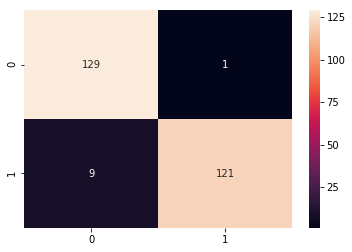

In [7]:
sns.heatmap(confusion_matrix(test_labels, result),annot=True, fmt='d')
plt.show()